# Spam Detection Project Reproduce new data

In [114]:
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import patsy
os.chdir(r"C:\Users\serei\Desktop\Untitled Folder")

The analysis will be conducted using word frequencies from the old research as well as a new word list from the new datsaset. 

## New Data New Words

Import and prepare the dataset for analysis:

In [115]:
spam = pd.read_csv("new_data_new_words.csv")
spam.dropna(inplace = True)

#Renaming character columns to a less error-prone form
spam.rename(columns = {'$':'dollar',
                       '!': 'exclamation',
                      "#": "hashtag",
                       "(":"parenthesis",
                       "[": "brackets",
                       ";": "semicolon",
                       "€": "euro",
                       "@": "at", 
                       "?": "question"
                      }, inplace = True)

#Drop columns not neccessary to the analysis
spam.drop(columns=['Unnamed: 0', 'processed_text', 'word_count'], inplace = True)

#Rename columns to include word_freq
column_names = spam.columns.tolist()
new_column_names = ['spam'] + ['word_freq_' + column if column != 'spam' else column for column in column_names[1:]]

spam.rename(columns=dict(zip(column_names, new_column_names)), inplace=True)

#Convert the dependent variable to a numeric one
spam['spam'] = spam['spam'].replace({
    'spam': 1,
    'ham': 0})

In [49]:
spam.describe

<bound method NDFrame.describe of       spam  word_freq_u  word_freq_call  word_freq_get  word_freq_ur  \
0        0          0.0            0.00            0.0           0.0   
1        0          0.0            0.00            0.0           0.0   
2        1          0.0            0.00            0.0           0.0   
3        0          0.0            0.00            0.0           0.0   
4        0          0.0            0.00            0.0           0.0   
...    ...          ...             ...            ...           ...   
5567     1          0.0            0.08            0.0           0.0   
5568     0          0.0            0.00            0.0           0.0   
5569     0          0.0            0.00            0.0           0.0   
5570     0          0.0            0.00            0.0           0.0   
5571     0          0.0            0.00            0.0           0.0   

      word_freq_gt  word_freq_lt  word_freq_go  word_freq_free  \
0              0.0           0.0   

Very low variances in independent variables cause errors in the models. We set a treshold for the variances of the columns and keep only the columns that can be included in the analysis. 

In [116]:
variance = spam.var()

# Set the threshold value
threshold = 0.003

# Filter columns based on variance threshold
filtered_columns = variance[variance >= threshold].index

# Create a new DataFrame with selected columns
spam = spam[filtered_columns]

spam.var()

spam                      0.116111
word_freq_call            0.005306
word_freq_get             0.003488
word_freq_ur              0.003405
word_freq_gt              0.007387
word_freq_lt              0.009940
word_freq_go              0.004034
word_freq_free            0.004759
word_freq_come            0.003268
word_freq_day             0.003685
word_freq_time            0.003465
word_freq_text            0.004684
word_freq_love            0.003443
word_freq_send            0.003109
word_freq_need            0.003308
word_freq_going           0.004255
word_freq_sorry           0.004954
word_freq_still           0.004305
word_freq_take            0.003129
word_freq_da              0.004420
word_freq_dont            0.003515
word_freq_later           0.007791
word_freq_exclamation     0.003834
word_freq_digit_count    38.995783
dtype: float64

Let us check the distribution of spam and non-spam mails

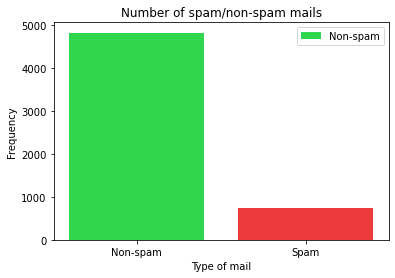

In [117]:
spam_count = spam["spam"].value_counts()
perc_yes = round(spam_count[1] / len(spam) * 100, 2)
perc_no = round(spam_count[0] / len(spam) * 100, 2)

plt.bar(["Non-spam", "Spam"], spam_count, color=["#31d64f", "#ed3b3b"])
plt.title("Number of spam/non-spam mails")
plt.xlabel("Type of mail")
plt.ylabel("Frequency")
plt.legend(["Non-spam", "Spam"])
plt.show()

## Start from the most general model that contains all explanatory variables

In [118]:
formula = "spam ~ " + " + ".join(spam.columns[1:])

### Probit model
---

In [119]:
myprobit = sm.Probit.from_formula(formula, data=spam).fit()
print(myprobit.summary())

         Current function value: 0.084801
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                         Probit   Df Residuals:                     5548
Method:                           MLE   Df Model:                           23
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                  0.7848
Time:                        20:11:17   Log-Likelihood:                -472.51
converged:                      False   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.2321      0.061    -36.431      0.000      -2.352      -2.112
word_freq_call           -3.0682

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Logit model
---

In [120]:
mylogit = sm.Logit.from_formula(formula, data=spam).fit()
print(mylogit.summary())

         Current function value: 0.084299
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5548
Method:                           MLE   Df Model:                           23
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                  0.7861
Time:                        20:11:20   Log-Likelihood:                -469.72
converged:                      False   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.2063      0.143    -29.436      0.000      -4.486      -3.926
word_freq_call           -5.9051

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Significance test of models

Both models p-values are 0, so null hypothesis can be rejected. It means that the model`s coefficients are jointly significant

In [121]:
null_probit = sm.Probit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam)))).fit()
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 5
Probit likelihood ratio test p-value: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [122]:
null_logit = sm.Logit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam)))).fit()
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 6
Logit likelihood ratio test p-value: 0.0


## Stepwise regression

In [123]:
p_probit = myprobit.pvalues
spam_temp_probit = spam.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_probit.columns[1:]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)

word_freq_gt
         Current function value: 0.084816
         Iterations: 35
991.1940869610173
word_freq_da


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.085715
         Iterations: 35
999.2063848097096
word_freq_lt
         Current function value: 0.090247
         Iterations: 35
1047.7131104852485
word_freq_later


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.090668
         Iterations 10
1050.4072904922891
word_freq_get
Optimization terminated successfully.
         Current function value: 0.090669
         Iterations 10
1048.4154478192277
word_freq_go
Optimization terminated successfully.
         Current function value: 0.090671
         Iterations 10
1046.4426142168152
word_freq_dont
Optimization terminated successfully.
         Current function value: 0.090676
         Iterations 10
1044.4917974879752
word_freq_day
Optimization terminated successfully.
         Current function value: 0.090683
         Iterations 10
1042.5711276093857
word_freq_take
Optimization terminated successfully.
         Current function value: 0.090704
         Iterations 10
1040.8103242756306
word_freq_come
Optimization terminated successfully.
         Current function value: 0.090728
         Iterations 10
1039.0676621119137
word_freq_send
Optimization terminated successfully.
       

In [124]:
p_logit = mylogit.pvalues
spam_temp_logit = spam.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_logit.columns[1:]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

word_freq_gt


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.084316
         Iterations: 35
985.6201246859478
word_freq_da
         Current function value: 0.085355
         Iterations: 35
995.1955540349777
word_freq_lt
         Current function value: 0.090632
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1051.9988162051395
word_freq_later
Optimization terminated successfully.
         Current function value: 0.091062
         Iterations 11
1054.7944439196922
word_freq_get
Optimization terminated successfully.
         Current function value: 0.091063
         Iterations 11
1052.801501186288
word_freq_day
Optimization terminated successfully.
         Current function value: 0.091064
         Iterations 11
1050.8192514721536
word_freq_go
Optimization terminated successfully.
         Current function value: 0.091069
         Iterations 11
1048.8679678238063
word_freq_dont
Optimization terminated successfully.
         Current function value: 0.091080
         Iterations 11
1046.9987516065285
word_freq_come
Optimization terminated successfully.
         Current function value: 0.091120
         Iterations 11
1045.4394448721005
word_freq_take
Optimization terminated successfully.
         Current function value: 0.091180
         Iterations 11
1044.1081245022165
word_freq_time
Optimizatio

### Interaction terms
Adding interaction terms and deleting insignificant ones for probit.

In [70]:
spam.columns

Index(['spam', 'word_freq_call', 'word_freq_get', 'word_freq_ur',
       'word_freq_gt', 'word_freq_lt', 'word_freq_go', 'word_freq_free',
       'word_freq_come', 'word_freq_day', 'word_freq_time', 'word_freq_text',
       'word_freq_love', 'word_freq_send', 'word_freq_need', 'word_freq_going',
       'word_freq_sorry', 'word_freq_still', 'word_freq_take', 'word_freq_da',
       'word_freq_dont', 'word_freq_later', 'word_freq_exclamation',
       'word_freq_digit_count'],
      dtype='object')

In [166]:
formula_interactions = "spam ~  word_freq_free * word_freq_exclamation  + word_freq_send "
myprobit = sm.Probit.from_formula(formula_interactions, data=spam).fit()
p_probit = myprobit.pvalues
spam_temp_probit = spam.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_probit.columns[1:]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)


Optimization terminated successfully.
         Current function value: 0.339735
         Iterations 8


In [158]:
mylogit = sm.Logit.from_formula(formula_interactions, data=spam).fit()
p_logit = mylogit.pvalues
spam_temp_probit = spam.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_logit.columns[1:]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

Optimization terminated successfully.
         Current function value: 0.340333
         Iterations 9


In [160]:
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Probit likelihood ratio test p-value: 1.2652102247814454e-133


In [161]:
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Logit likelihood ratio test p-value: 3.567628329112654e-132


## Recration from line 267 from R code

In [167]:
formula_interactions = "spam ~  word_freq_free * word_freq_exclamation  + word_freq_send "

myprobit = sm.Probit.from_formula(formula=formula_interactions, data=spam).fit()

p = myprobit.pvalues
print(p)

Optimization terminated successfully.
         Current function value: 0.339735
         Iterations 8
Intercept                               0.000000e+00
word_freq_free                          1.892276e-34
word_freq_exclamation                   2.398555e-58
word_freq_free:word_freq_exclamation    3.194177e-08
word_freq_send                          8.336926e-04
dtype: float64


In [168]:
i = 1
while any(p > 0.05):
    worstp = p.idxmax()
    print(worstp)

    if i == 1:
        # Remove the outcome variable from the formula
        formula_interactions = formula_interactions.replace("spam ~ ", "")

        # Create the design matrix with interaction terms
        X = patsy.dmatrix(formula_interactions, data=spam)

        # Convert the design matrix to a DataFrame
        X = pd.DataFrame(X, columns=X.design_info.column_names)
        i=2
    else:
        X = X.drop(worstp, axis=1)
        X_names = ['Intercept'] + list(X.columns)[1:]
        X.columns = X_names

        myprobit = sm.Probit(spam['spam'], X).fit()

        print(myprobit.summary())
        p = myprobit.pvalues
        print(myprobit.aic)

# New Data Old Words

In this part of the analysis we will try to recreate the previous research on the new data directly.

In [94]:
spam_previous_words = pd.read_csv("new_data_old_words.csv")
spam_previous_words.dropna(inplace = True)

#Renaming character columns to a less error-prone form
spam_previous_words.rename(columns = {'$':'dollar',
                       '!': 'exclamation',
                      "#": "hashtag",
                       "(":"parenthesis",
                       "[": "brackets",
                       ";": "semicolon",
                       "€": "euro",
                       "@": "at", 
                       "?": "question"
                      }, inplace = True)

#Drop columns not neccessary to the analysis
spam_previous_words.drop(columns=['Unnamed: 0', 'processed_text', 'word_count'], inplace = True)

#Rename columns to include word_freq
column_names = spam_previous_words.columns.tolist()
new_column_names = ['spam'] + ['word_freq_' + column if column != 'spam' else column for column in column_names[1:]]

spam_previous_words.rename(columns=dict(zip(column_names, new_column_names)), inplace=True)

#Convert the dependent variable to a numeric one
spam_previous_words['spam'] = spam_previous_words['spam'].replace({
    'spam': 1,
    'ham': 0})

In [86]:
spam_previous_words.describe

<bound method NDFrame.describe of       spam  word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0        0             0.0                0.0           0.00           0.0   
1        0             0.0                0.0           0.00           0.0   
2        1             0.0                0.0           0.00           0.0   
3        0             0.0                0.0           0.00           0.0   
4        0             0.0                0.0           0.00           0.0   
...    ...             ...                ...            ...           ...   
5567     1             0.0                0.0           0.04           0.0   
5568     0             0.0                0.0           0.00           0.0   
5569     0             0.0                0.0           0.00           0.0   
5570     0             0.0                0.0           0.00           0.0   
5571     0             0.0                0.0           0.00           0.0   

      word_freq_our  word_fre

We once again remove the columns with very low variances to ensure that the selected models run smoothly. We decrease the treshold as the previously used words are less frequently found in the new dataset. 

In [99]:
variance = spam_previous_words.var()

# Set the threshold value
threshold = 0.00017

# Filter columns based on variance threshold
filtered_columns = variance[variance >= threshold].index

# Create a new DataFrame with selected columns
spam_previous_words = spam_previous_words[filtered_columns]

spam_previous_words.var()

spam                     0.116111
word_freq_make           0.000206
word_freq_all            0.002106
word_freq_our            0.000249
word_freq_free           0.000335
word_freq_meeting        0.000171
word_freq_re             0.005786
word_freq_edu            0.000193
word_freq_semicolon      0.000912
word_freq_exclamation    0.002293
word_freq_hashtag        0.000174
dtype: float64

## Start from the most general model that contains all explanatory variables

In [100]:
formula = "spam ~ " + " + ".join(spam_previous_words.columns[1:])

### Probit model
---

In [101]:
myprobit = sm.Probit.from_formula(formula, data=spam_previous_words).fit()
print(myprobit.summary())

         Current function value: 0.346699
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                         Probit   Df Residuals:                     5561
Method:                           MLE   Df Model:                           10
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                  0.1201
Time:                        19:54:57   Log-Likelihood:                -1931.8
converged:                      False   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                5.689e-107
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.3365      0.030    -44.156      0.000      -1.396      -1.277
word_freq_make           -2.8613

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Logit model
---

In [102]:
mylogit = sm.Logit.from_formula(formula, data=spam_previous_words).fit()
print(mylogit.summary())

         Current function value: 0.345718
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5561
Method:                           MLE   Df Model:                           10
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                  0.1226
Time:                        19:55:01   Log-Likelihood:                -1926.3
converged:                      False   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                2.607e-109
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.2665      0.057    -39.851      0.000      -2.378      -2.155
word_freq_make           -5.0935

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Significance test of models

Both models p-values are below the 0.05 treshold, so the null hypothesis can be rejected. It means that the model`s coefficients are jointly significant

In [103]:
null_probit = sm.Probit(spam_previous_words["spam"], sm.add_constant(pd.Series([1] * len(spam_previous_words)))).fit()
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 5
Probit likelihood ratio test p-value: 9.630820582497978e-117


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [104]:
null_logit = sm.Probit(spam_previous_words["spam"], sm.add_constant(pd.Series([1] * len(spam_previous_words)))).fit()
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Optimization terminated successfully.
         Current function value: 0.394038
         Iterations 5
Logit likelihood ratio test p-value: 4.026157970994626e-119


### Stepwise regression

In [105]:
p_probit = myprobit.pvalues
spam_temp_probit = spam_previous_words.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_probit.columns[1:]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)

word_freq_edu
         Current function value: 0.346699
         Iterations: 35
3883.611568279134
word_freq_meeting
Optimization terminated successfully.
         Current function value: 0.347861
         Iterations 9
3894.5620657017016
word_freq_our
Optimization terminated successfully.
         Current function value: 0.347931
         Iterations 9
3893.347126774049
word_freq_make
Optimization terminated successfully.
         Current function value: 0.348152
         Iterations 9
3893.8012646323755
word_freq_hashtag
Optimization terminated successfully.
         Current function value: 0.348337
         Iterations 9
3893.8690589270027


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
p_logit = mylogit.pvalues
spam_temp_logit = spam_previous_words.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_logit.columns[1:]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

word_freq_meeting
Optimization terminated successfully.
         Current function value: 0.346883
         Iterations 10
3885.6663210969095
word_freq_edu
Optimization terminated successfully.
         Current function value: 0.346883
         Iterations 10
3883.6680761623174
word_freq_our
Optimization terminated successfully.
         Current function value: 0.346967
         Iterations 10
3882.598757849926
word_freq_make
Optimization terminated successfully.
         Current function value: 0.347171
         Iterations 10
3882.8707237137123
word_freq_hashtag
Optimization terminated successfully.
         Current function value: 0.347500
         Iterations 10
3884.543201635922


### Interaction terms
---
We include the interaction terms from the previous research. The variables that were discarded due to low variances are excluded from the interaction terms.

In [108]:
spam_previous_words.columns

Index(['spam', 'word_freq_make', 'word_freq_all', 'word_freq_our',
       'word_freq_free', 'word_freq_meeting', 'word_freq_re', 'word_freq_edu',
       'word_freq_semicolon', 'word_freq_exclamation', 'word_freq_hashtag'],
      dtype='object')

In [111]:
formula_interactions = "spam ~ word_freq_make * word_freq_our  +  word_freq_re + word_freq_edu +word_freq_all+ word_freq_make+ word_freq_meeting + word_freq_our + word_freq_semicolon * word_freq_exclamation * word_freq_hashtag"
myprobit = sm.Probit.from_formula(formula_interactions, data=spam_previous_words).fit()
p_probit = myprobit.pvalues
spam_temp_probit = spam_previous_words.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_probit.columns[:-1]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)

Optimization terminated successfully.
         Current function value: nan
         Iterations 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2192: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)


In [112]:
myprobit.pvalues

Intercept                                                     NaN
word_freq_make                                                NaN
word_freq_our                                                 NaN
word_freq_make:word_freq_our                                  NaN
word_freq_re                                                  NaN
word_freq_edu                                                 NaN
word_freq_all                                                 NaN
word_freq_meeting                                             NaN
word_freq_semicolon                                           NaN
word_freq_exclamation                                         NaN
word_freq_semicolon:word_freq_exclamation                     NaN
word_freq_hashtag                                             NaN
word_freq_semicolon:word_freq_hashtag                         NaN
word_freq_exclamation:word_freq_hashtag                       NaN
word_freq_semicolon:word_freq_exclamation:word_freq_hashtag   NaN
dtype: flo

In [163]:
formula_interactions = "spam ~ word_freq_hashtag * word_freq_exclamation + word_freq_edu  + word_freq_meeting"

myprobit = sm.Probit.from_formula(formula=formula_interactions, data=spam_previous_words).fit()

p = myprobit.pvalues
print(p)

         Current function value: 0.381052
         Iterations: 35
Intercept                                  0.000000e+00
word_freq_hashtag                          4.575697e-05
word_freq_exclamation                      1.223815e-23
word_freq_hashtag:word_freq_exclamation    2.806051e-01
word_freq_edu                              9.176832e-01
word_freq_meeting                          9.815993e-01
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [164]:
i = 1
while any(p > 0.05):
    worstp = p.idxmax()
    print(worstp)

    if i == 1:
        # Remove the outcome variable from the formula
        formula_interactions = formula_interactions.replace("spam ~ ", "")

        # Create the design matrix with interaction terms
        X = patsy.dmatrix(formula_interactions, data=spam_previous_words)

        # Convert the design matrix to a DataFrame
        X = pd.DataFrame(X, columns=X.design_info.column_names)
        i=2
    else:
        X = X.drop(worstp, axis=1)
        X_names = ['Intercept'] + list(X.columns)[1:]
        X.columns = X_names

        myprobit = sm.Probit(spam_previous_words['spam'], X).fit()

        print(myprobit.summary())
        p = myprobit.pvalues
        print(myprobit.aic)

word_freq_meeting
word_freq_meeting
Optimization terminated successfully.
         Current function value: 0.382031
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 5572
Model:                         Probit   Df Residuals:                     5567
Method:                           MLE   Df Model:                            4
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                 0.03047
Time:                        20:26:00   Log-Likelihood:                -2128.7
converged:                       True   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                 5.958e-28
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept     